In [3]:
#Perform EDA OF SECO DATA-1 and SECO DATA-2 (Satellite images data)
import numpy as np
import os
import glob
import rasterio
import glob
import sys  
sys.path.insert(0, '/home/akansh-i2sc/Desktop/Study/HLCV/Why-Self-Supervision-in-Time/src/modules')
import seco_dataset_temporal as seco
import matplotlib.pyplot as plt

In [4]:
path2data =  "/home/akansh-i2sc/Desktop/Study/HLCV/SeCo_dataset/seco_100k/seasonal_contrast_100k/"
dataset_1 = seco.SeasonalContrastTemporal(root=path2data)
dataset_2 = seco.SeasonalContrastBasic(root=path2data)

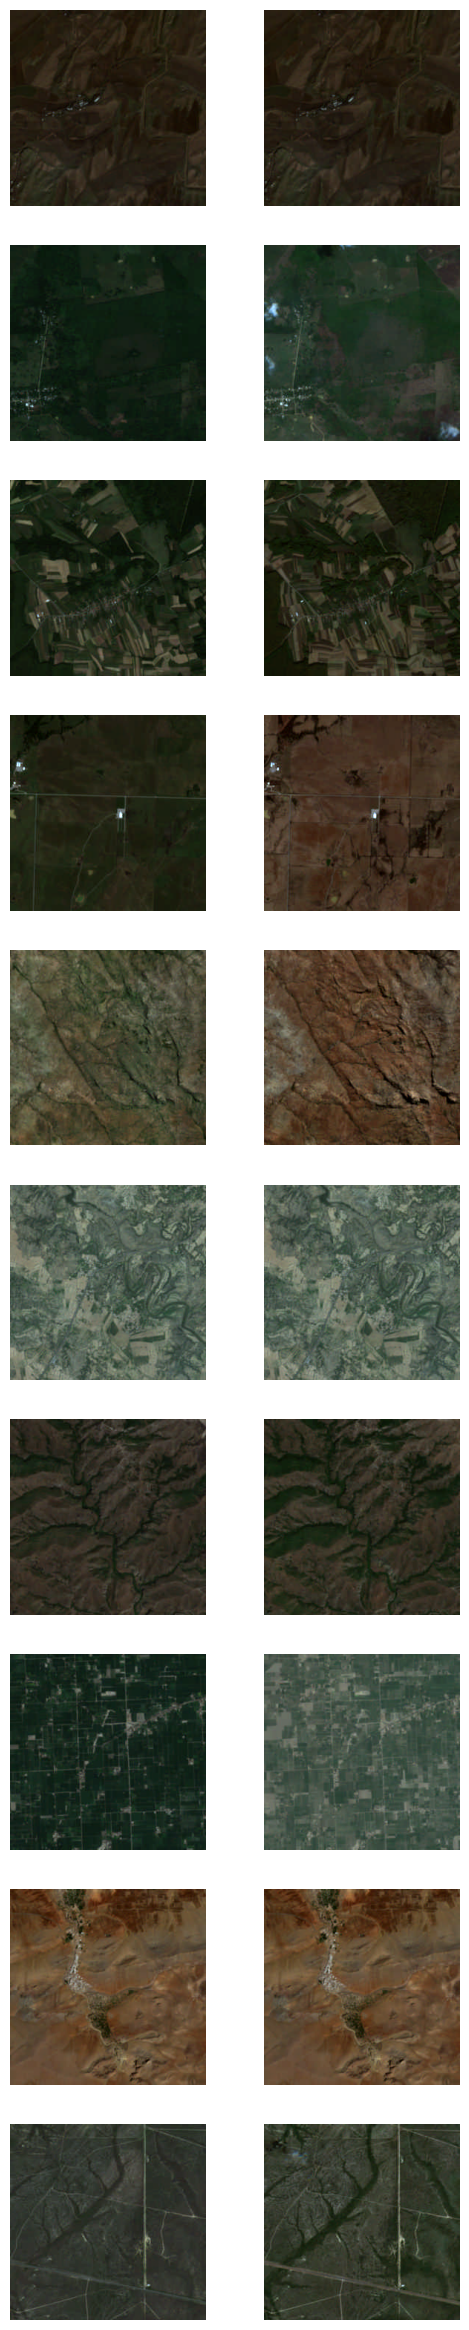

In [8]:
l = [9336, 19735, 7775, 5098, 10045, 642, 14899, 8342, 18868, 25]
plt.figure(figsize=(6, 30))
i = 1
for j in l:
    plt.subplot(10, 2, i)
    plt.imshow(dataset_1.__getitem__(j)[0])
    plt.axis('off')
    plt.subplot(10, 2, i+1)
    plt.imshow(dataset_1.__getitem__(j)[1])
    plt.axis('off')
    i += 2

In [32]:
for x in dataset_1:
    print(x)
    break

<PIL.Image.Image image mode=RGB size=264x264 at 0x7F8ABC81B910>


In [36]:
from PIL import Image
import os
from tqdm import tqdm

def resize_and_save(input_img, output_path, target_size):
    # Resize the image while maintaining aspect ratio
    input_img.thumbnail(target_size, Image.ANTIALIAS)
    # Save the resized image in JPEG format
    input_img.save(output_path, "JPEG")


In [45]:
# Example usage
output_folder = "/home/akansh-i2sc/Desktop/Study/HLCV/SeCo_dataset/seco_100k/jpeg_40k"
target_size = (224, 224)  # Specify the desired target size (width, height)
for i, img in tqdm(enumerate(dataset_1)):
    resize_and_save(img[0], os.path.join(output_folder, str(i)+'.jpg'), target_size)
    resize_and_save(img[1], os.path.join(output_folder, 'temp'+str(i)+'jpg'), target_size)

0it [00:00, ?it/s]/tmp/ipykernel_300280/3424389447.py:7: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  input_img.thumbnail(target_size, Image.ANTIALIAS)
20000it [03:06, 107.02it/s]


In [47]:
output_folder = "/home/akansh-i2sc/Desktop/Study/HLCV/SeCo_dataset/seco_100k/jpeg_100k"
target_size = (224, 224)  # Specify the desired target size (width, height)
for i, img in tqdm(enumerate(dataset_2)):
    resize_and_save(img, os.path.join(output_folder, str(i)+'.jpg'), target_size)

0it [00:00, ?it/s]/tmp/ipykernel_300280/3424389447.py:7: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  input_img.thumbnail(target_size, Image.ANTIALIAS)
100000it [07:40, 217.35it/s]
